In [2]:
import numpy as np
import pandas as pd

mandarine_consume = pd.read_excel('predict_consume2.xlsx', index_col='년도')
mandarine_consume
mandarine_consume.describe()
mandarine_consume.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1985 to 2019
Data columns (total 24 columns):
 귤도매가격            24 non-null float64
귤소매가격             27 non-null float64
오렌지도매가격           22 non-null float64
오렌지소매가격           22 non-null float64
사과도매가격            24 non-null float64
배도매가격             24 non-null float64
딸기도매가격            24 non-null float64
감도매가격             24 non-null float64
바나나도매가격           24 non-null float64
참다래도매가격(수입)       24 non-null float64
포도도매가격            24 non-null float64
생산자물가지수(감귤)       35 non-null float64
소비자물가지수(감귤)       35 non-null float64
1인당 가처분소득         26 non-null float64
1인당 연간소비량(kg)     21 non-null float64
gdp_deflator      26 non-null float64
과일류 1인당 연간 소비량    22 non-null float64
1인가구비율            19 non-null float64
수입개방화(신선)         10 non-null float64
수입개방화(가공)         10 non-null float64
수입량(톤)            10 non-null float64
수입액(천달러)          10 non-null float64
수입량(톤).1          11 non-null float64
수입액(천달러).1        

In [3]:
mandarine_consume.columns = ['mand_whole_price', 'mand_retail_price', 'orange_whole_price', 'orange_retail_price',
                             'apple_whole_price', 'pear_whole_price', 'strberry_whole_price', 'persimon_whole_price',
                             'banana_whole_price','kiwi_whole_price', 'graph_whole_price',
                            'product_index', 'consumer_index', 'per_person_income', 'per_person_consume_kg', 'gpd_deflator',
                            'per_person_fruit_kg','alone_house_ratio','fresh_import','product_import','import_ton',
                            'import_dollar','import_ton2', 'import_dollar2']

In [4]:
# y를 평균으로 채운 것 per_person_consume_kg_fillmean / 아닌건 per_person_consume_kg
median = mandarine_consume['per_person_consume_kg'].median()
mean = mandarine_consume['per_person_consume_kg'].mean()
mean
mandarine_consume['per_person_consume_kg_fillmean'] = mandarine_consume['per_person_consume_kg'].fillna(mean)
mandarine_consume['per_person_consume_kg_fillmean']

년도
1985     9.100000
1986    12.833333
1987    12.833333
1988    12.833333
1989    12.833333
1990    11.500000
1991    12.833333
1992    12.833333
1993    12.833333
1994    12.833333
1995    13.600000
1996    12.833333
1997    12.833333
1998    12.833333
1999    12.833333
2000    11.900000
2001    12.833333
2002    13.300000
2003    13.000000
2004    12.000000
2005    13.100000
2006    12.700000
2007    16.000000
2008    13.000000
2009    15.200000
2010    12.400000
2011    13.600000
2012    13.700000
2013    13.400000
2014    14.200000
2015    12.500000
2016    11.900000
2017    11.600000
2018    11.800000
2019    12.833333
Name: per_person_consume_kg_fillmean, dtype: float64

In [5]:
mandarine_consume['fresh_import'] = mandarine_consume['fresh_import'].fillna(method='ffill')
mandarine_consume['fresh_import'] = mandarine_consume['fresh_import'].fillna(0)
mandarine_consume['product_import'] = mandarine_consume['product_import'].fillna(method='ffill')
mandarine_consume['product_import'] = mandarine_consume['product_import'].fillna(0)

In [6]:
drop_columns = ['import_ton', 'import_dollar', 'import_ton2', 'import_dollar2', 'alone_house_ratio', 'per_person_fruit_kg']
mandarine_consume_df = mandarine_consume.drop(columns=drop_columns)

In [7]:
mandarine_consume_df = mandarine_consume_df.dropna()
mandarine_consume_df

,mand_whole_price,mand_retail_price,orange_whole_price,orange_retail_price,apple_whole_price,pear_whole_price,strberry_whole_price,persimon_whole_price,banana_whole_price,kiwi_whole_price,graph_whole_price,product_index,consumer_index,per_person_income,per_person_consume_kg,gpd_deflator,fresh_import,product_import,per_person_consume_kg_fillmean
년도,,,,,,,,,,,,,,,,,,,
2000,7417.333333,11800.000000,14240.000000,52580.0,17460.0,14560.0,26330.0,10600.0,8610.0,32130.0,1571.0,58.74,55.410,61964.6448,11.9,72.119,0.0,0.0,11.9
2002,5312.000000,8866.666667,22410.000000,63440.0,27500.0,16510.0,34850.0,18000.0,11390.0,30640.0,2127.0,84.83,84.325,75338.7816,13.3,76.892,0.0,0.0,13.3
2003,9075.000000,26300.000000,17700.000000,56280.0,22660.0,14620.0,43200.0,17590.0,10660.0,33510.0,2561.0,57.45,63.620,82105.3168,13.0,79.544,0.0,0.0,13.0
2004,12609.000000,27000.000000,18720.000000,58280.0,36010.0,26480.0,43380.0,19540.0,10310.0,35080.0,3220.0,96.77,85.198,90825.8304,12.0,82.032,0.0,0.0,12.0
2005,12133.000000,16500.000000,16700.000000,63520.0,41280.0,19550.0,49150.0,22930.0,9880.0,35050.0,2849.0,143.35,106.735,95684.7528,13.1,82.887,0.0,0.0,13.1
2006,13026.000000,31800.000000,18650.000000,63380.0,30310.0,13420.0,46880.0,18750.0,10400.0,31220.0,3099.0,100.05,84.334,99341.6424,12.7,82.702,0.0,0.0,12.7
2007,7101.000000,13100.000000,23090.000000,70610.0,30950.0,22210.0,59720.0,21370.0,10780.0,30700.0,2902.0,157.50,109.137,107368.2552,16.0,84.702,0.0,0.0,16.0
2008,12719.000000,22100.000000,19320.000000,60350.0,29200.0,13370.0,59920.0,17860.0,12830.0,32550.0,3165.0,59.02,67.663,116943.7992,13.0,87.096,1.6,1.4,13.0
2009,11353.000000,19300.000000,27400.000000,80370.0,30960.0,18680.0,58650.0,20750.0,15830.0,37830.0,2607.0,73.20,93.346,124746.3936,15.2,90.239,1.6,1.4,15.2


In [9]:
# 실질가격 변환 없이 명목가격으로 한번 해보쟈...
cols_fruit = ['mand_whole_price', 'orange_whole_price', 'apple_whole_price', 'pear_whole_price',
              'strberry_whole_price', 'persimon_whole_price', 'banana_whole_price', 'kiwi_whole_price',
              'graph_whole_price', 'per_person_income','per_person_consume_kg']
mandarine_consume_df_final = mandarine_consume_df[cols_fruit]
mandarine_consume_df_final

,mand_whole_price,orange_whole_price,apple_whole_price,pear_whole_price,strberry_whole_price,persimon_whole_price,banana_whole_price,kiwi_whole_price,graph_whole_price,per_person_income,per_person_consume_kg
년도,,,,,,,,,,,
2000,7417.333333,14240.000000,17460.0,14560.0,26330.0,10600.0,8610.0,32130.0,1571.0,61964.6448,11.9
2002,5312.000000,22410.000000,27500.0,16510.0,34850.0,18000.0,11390.0,30640.0,2127.0,75338.7816,13.3
2003,9075.000000,17700.000000,22660.0,14620.0,43200.0,17590.0,10660.0,33510.0,2561.0,82105.3168,13.0
2004,12609.000000,18720.000000,36010.0,26480.0,43380.0,19540.0,10310.0,35080.0,3220.0,90825.8304,12.0
2005,12133.000000,16700.000000,41280.0,19550.0,49150.0,22930.0,9880.0,35050.0,2849.0,95684.7528,13.1
2006,13026.000000,18650.000000,30310.0,13420.0,46880.0,18750.0,10400.0,31220.0,3099.0,99341.6424,12.7
2007,7101.000000,23090.000000,30950.0,22210.0,59720.0,21370.0,10780.0,30700.0,2902.0,107368.2552,16.0
2008,12719.000000,19320.000000,29200.0,13370.0,59920.0,17860.0,12830.0,32550.0,3165.0,116943.7992,13.0
2009,11353.000000,27400.000000,30960.0,18680.0,58650.0,20750.0,15830.0,37830.0,2607.0,124746.3936,15.2


In [10]:
# 종속변수 / 독립변수 지정
X = mandarine_consume_df_final.iloc[:,:-1]
X
y = mandarine_consume_df_final.iloc[:,-1]

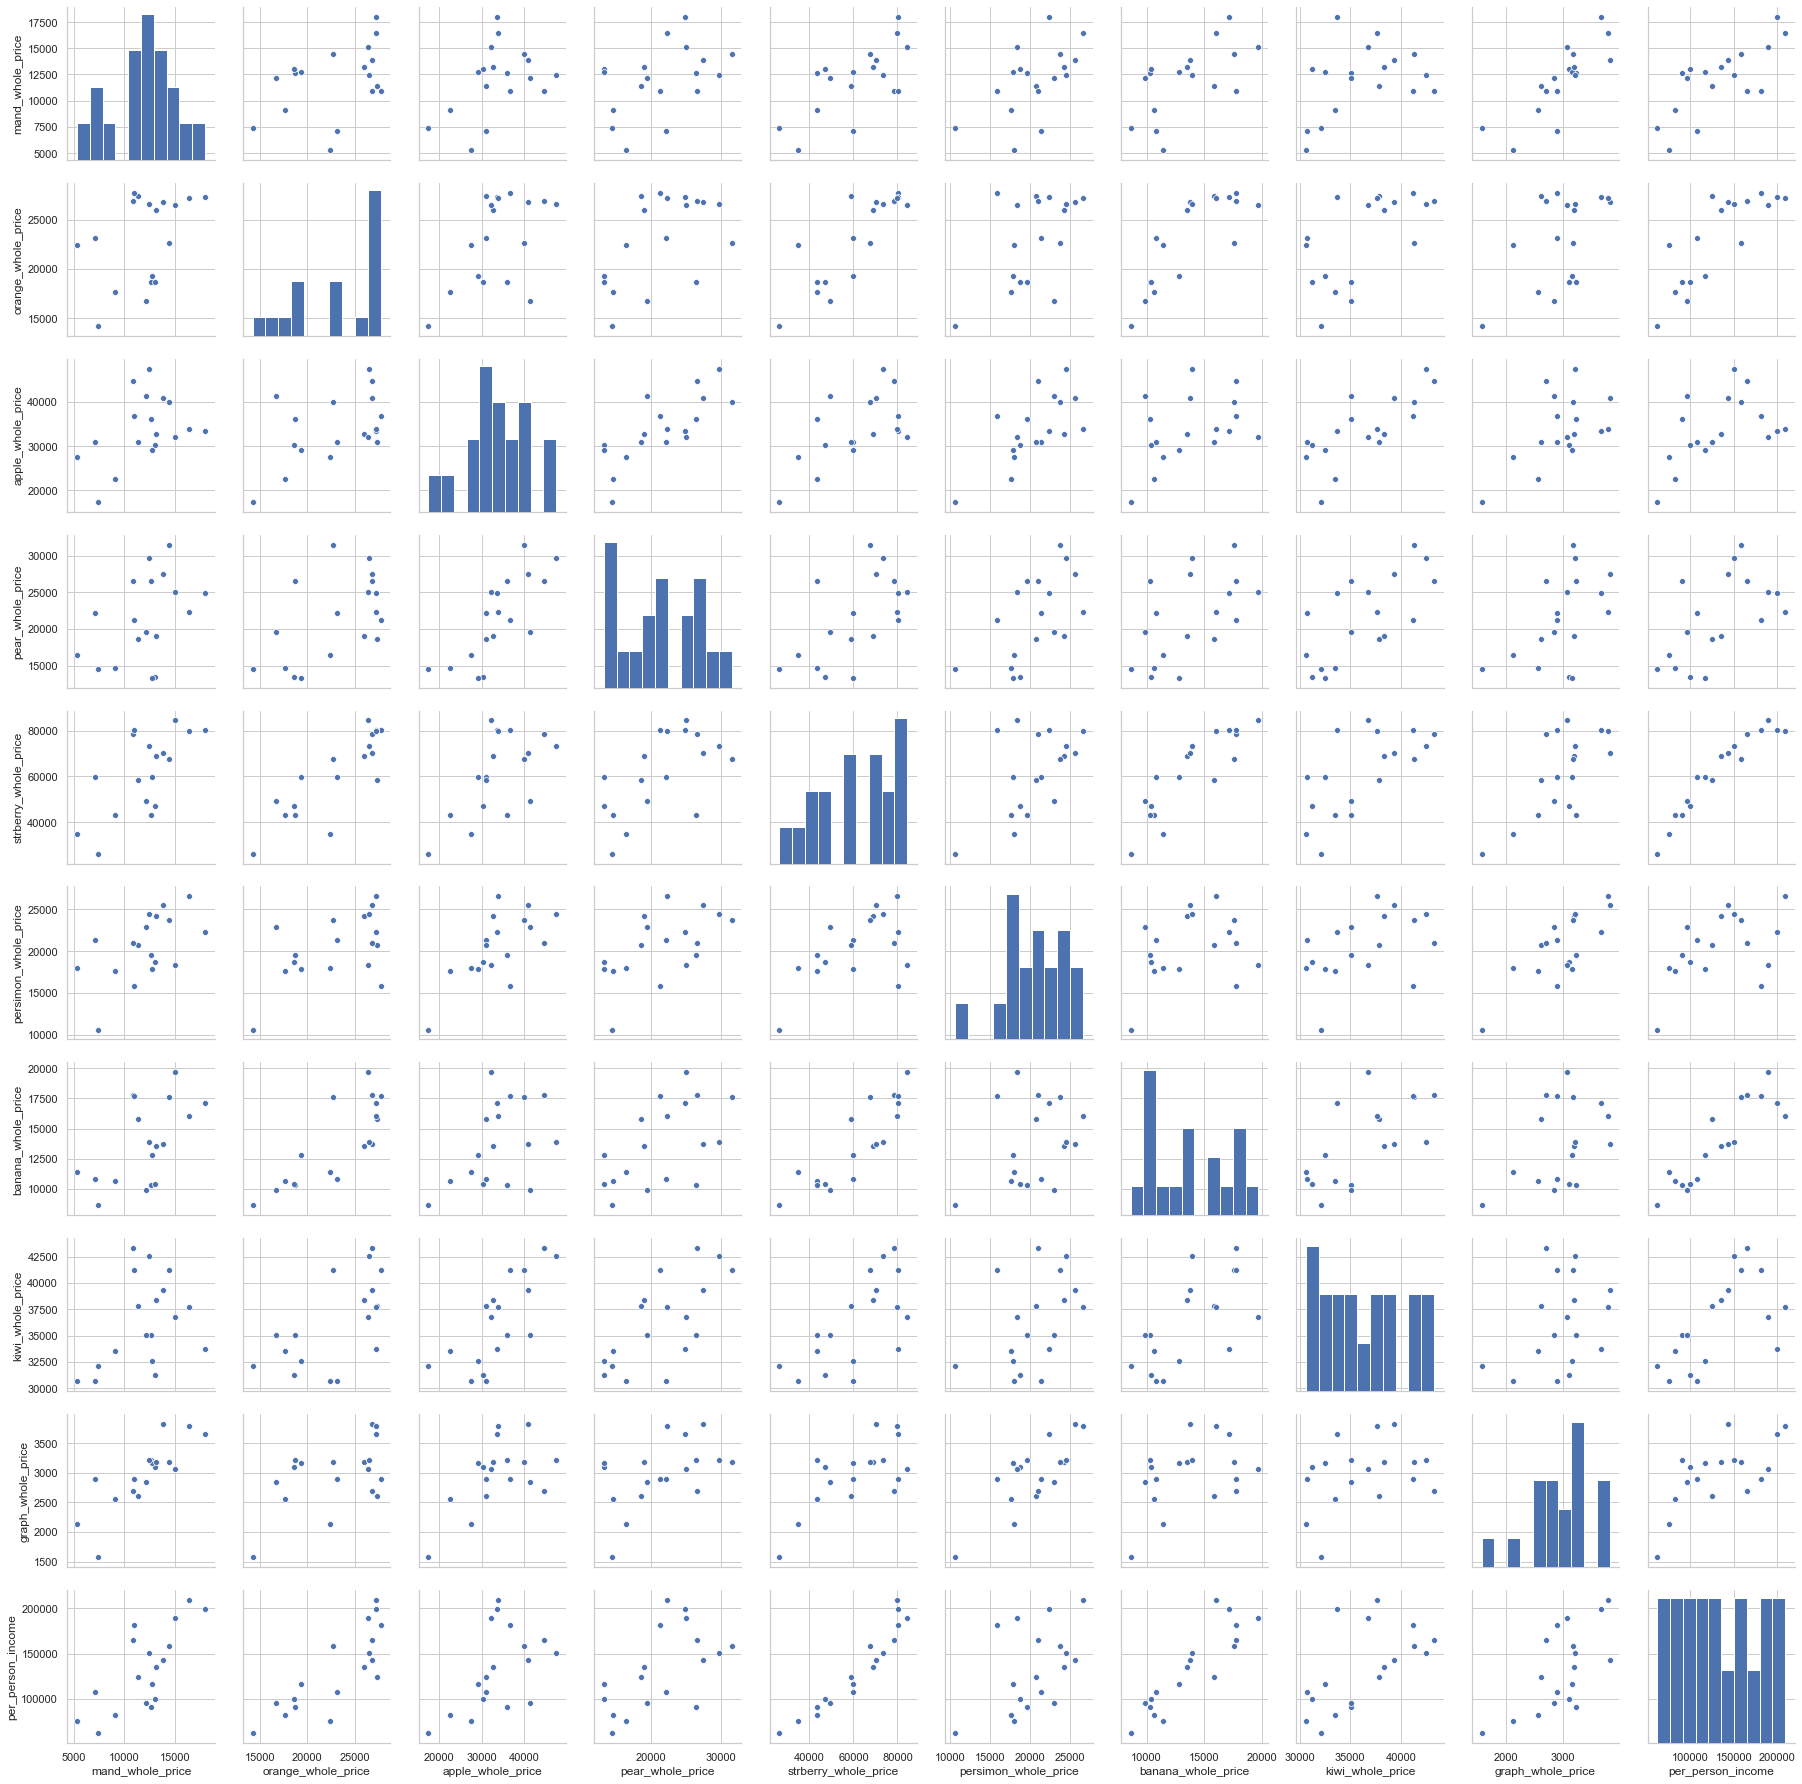

C:\Users\ICT01_13\Anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\ICT01_13\Anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\ICT01_13\Anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\ICT01_13\Anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\ICT01_13\Anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.level rcpara

In [11]:
# 페어플롯
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='notebook')
sns.pairplot(X, height=2.5)
plt.show()
sns.reset_orig()

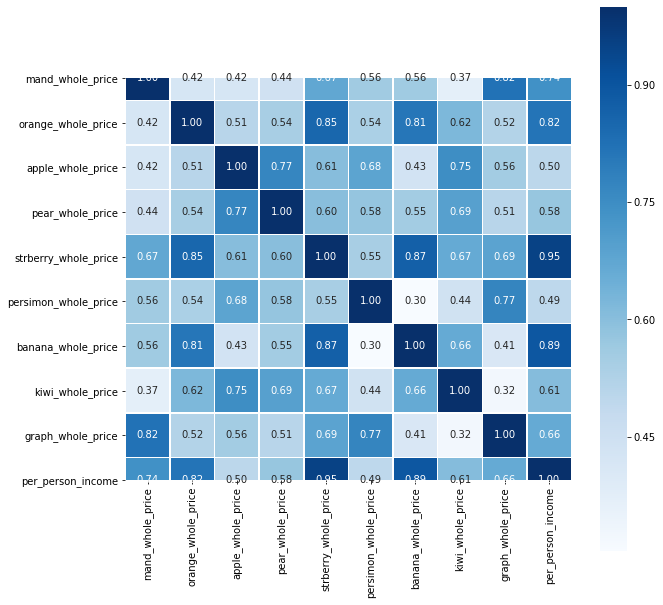

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(data=X.corr(), annot=True, square=True, fmt='.2f', linewidths=.5, cmap='Blues')
plt.show()

In [13]:
# 정규화 4가지 버젼 다 해보쟝
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale, StandardScaler
scale_X = scale(X)
robust_X = robust_scale(X)
minmax_X = minmax_scale(X)
maxabs_X = maxabs_scale(X)
scaler = StandardScaler()
stdScale_X = scaler.fit(X)

In [14]:
# train / test set을 나눕시당
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(minmax_X, y, random_state=0)

In [15]:
# 최소자승법을 해봅시다!
import statsmodels.api as sm
result = sm.OLS(y_train, X_train).fit()
result.summary()
# 사과, 딸기, 포도를 빼고 해야 하나?

C:\Users\ICT01_13\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     per_person_consume_kg   R-squared (uncentered):                   0.978
Model:                               OLS   Adj. R-squared (uncentered):              0.904
Method:                    Least Squares   F-statistic:                              13.21
Date:                   Tue, 21 Jan 2020   Prob (F-statistic):                      0.0283
Time:                           15:29:55   Log-Likelihood:                         -26.732
No. Observations:                     13   AIC:                                      73.46
Df Residuals:                          3   BIC:                                      79.11
Df Model:                             10                                                  
Covariance Type:               nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            43.0156     17.538      2.453      0.091     -12.799      98.830
x2            -9.6331     17.330     -0.556      0.617     -64.784      45.518
x3            -3.4875     13.393     -0.260      0.811     -46.112      39.136
x4           -11.1188     10.547     -1.054      0.369     -44.685      22.447
x5            11.8604     34.198      0.347      0.752     -96.972     120.692
x6           -18.2864     15.941     -1.147      0.335     -69.018      32.445
x7           -11.3571     20.591     -0.552      0.620     -76.888      54.173
x8            33.1198     15.294      2.166      0.119     -15.553      81.792
x9             0.1436     16.838      0.009      0.994     -53.443      53.730
x10          -12.7052     17.489     -0.726      0.520     -68.364      42.953
==============================================================================
Omnibus:                        4.318   Durbin-Watson:                   1.425
Prob(Omnibus):                  0.115   Jarque-Bera (JB):                1.738
Skew:                           0.825   Prob(JB):                        0.419
Kurtosis:                       3.698   Cond. No.                         73.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# 사과, 딸기, 포도를 빼고 간닷
cols_fruit_sub = ['mand_whole_price', 'orange_whole_price', 'pear_whole_price',
               'persimon_whole_price', 'banana_whole_price', 'kiwi_whole_price',
              'per_person_income','per_person_consume_kg']
mandarine_consume_df_sub = mandarine_consume_df[cols_fruit_sub]
mandarine_consume_df_sub

,mand_whole_price,orange_whole_price,pear_whole_price,persimon_whole_price,banana_whole_price,kiwi_whole_price,per_person_income,per_person_consume_kg
년도,,,,,,,,
2000,7417.333333,14240.000000,14560.0,10600.0,8610.0,32130.0,61964.6448,11.9
2002,5312.000000,22410.000000,16510.0,18000.0,11390.0,30640.0,75338.7816,13.3
2003,9075.000000,17700.000000,14620.0,17590.0,10660.0,33510.0,82105.3168,13.0
2004,12609.000000,18720.000000,26480.0,19540.0,10310.0,35080.0,90825.8304,12.0
2005,12133.000000,16700.000000,19550.0,22930.0,9880.0,35050.0,95684.7528,13.1
2006,13026.000000,18650.000000,13420.0,18750.0,10400.0,31220.0,99341.6424,12.7
2007,7101.000000,23090.000000,22210.0,21370.0,10780.0,30700.0,107368.2552,16.0
2008,12719.000000,19320.000000,13370.0,17860.0,12830.0,32550.0,116943.7992,13.0
2009,11353.000000,27400.000000,18680.0,20750.0,15830.0,37830.0,124746.3936,15.2


In [18]:
X_sub = mandarine_consume_df_sub.iloc[:,:-1]
X_sub
y_sub = mandarine_consume_df_sub.iloc[:,-1]

In [19]:
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale, StandardScaler
scale_X2 = scale(X_sub)
robust_X2 = robust_scale(X_sub)
minmax_X2 = minmax_scale(X_sub)
maxabs_X2 = maxabs_scale(X_sub)
scaler = StandardScaler()
stdScale_X2 = scaler.fit(X_sub)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y_sub, random_state=0)

import statsmodels.api as sm
result2 = sm.OLS(y_train, X_train).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     per_person_consume_kg   R-squared (uncentered):                   0.977
Model:                               OLS   Adj. R-squared (uncentered):              0.950
Method:                    Least Squares   F-statistic:                              36.22
Date:                   Tue, 21 Jan 2020   Prob (F-statistic):                    0.000171
Time:                           15:36:56   Log-Likelihood:                         -26.993
No. Observations:                     13   AIC:                                      67.99
Df Residuals:                          6   BIC:                                      71.94
Df Model:                              7                                                  
Covariance Type:               nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            44.1897      9.596      4.605      0.004      20.709      67.671
x2            -4.9766      7.736     -0.643      0.544     -23.907      13.954
x3           -13.8089      4.990     -2.767      0.033     -26.020      -1.598
x4           -17.8157      9.792     -1.819      0.119     -41.776       6.144
x5            -5.9901      9.870     -0.607      0.566     -30.142      18.161
x6            32.7075      9.802      3.337      0.016       8.724      56.691
x7           -11.5443     11.482     -1.005      0.353     -39.639      16.551
==============================================================================
Omnibus:                        5.788   Durbin-Watson:                   1.395
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                2.488
Skew:                           0.910   Prob(JB):                        0.288
Kurtosis:                       4.133   Cond. No.                         38.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
result2.params

x1    44.189712
x2    -4.976588
x3   -13.808860
x4   -17.815712
x5    -5.990109
x6    32.707452
x7   -11.544298
dtype: float64